In [1]:
import os
import pandas as pd
import numpy as np
import math
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import cm
from parse import *
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RandomForest
import random
from sklearn import linear_model
from datetime import datetime
import gc

pd.set_option("display.max_columns", 2000)


In [2]:
CHUNK_SIZE = 100000

start = datetime.now()

reader_date = pd.read_csv("train_date.csv",chunksize=CHUNK_SIZE, dtype=np.float32)
reader_num = pd.read_csv("output/df_id_response.csv",chunksize=CHUNK_SIZE, dtype=np.float32)

#分割して読み込み
loop = 0
cnt_0 = 0
cnt_1 = 0
for df_chunk_date in reader_date:
    df_chunk_num = reader_num.get_chunk(CHUNK_SIZE)
    
    df_chunk = pd.merge(on="Id", left=df_chunk_date, right=df_chunk_num)
    cnt_0 = cnt_0 + len(df_chunk[df_chunk['Response'] == 0].index)
    cnt_1 = cnt_1 + len(df_chunk[df_chunk['Response'] == 1].index)

    if loop == 0:
        df = df_chunk
    else:
        df = pd.concat([df, df_chunk])
    
    print("loop : {} / Rows = {}".format(loop, len(df.index)))

    loop = loop + 1

print("0:{}, 1:{}".format(cnt_0, cnt_1))
print("{} -> {}".format(start, datetime.now()))
print("Memory:{}".format(df.memory_usage(index=True).sum()))

loop : 0 / Rows = 100000
loop : 1 / Rows = 200000
loop : 2 / Rows = 300000
loop : 3 / Rows = 400000
loop : 4 / Rows = 500000
loop : 5 / Rows = 600000
loop : 6 / Rows = 700000
loop : 7 / Rows = 800000
loop : 8 / Rows = 900000
loop : 9 / Rows = 1000000
loop : 10 / Rows = 1100000
loop : 11 / Rows = 1183747
0:1176868, 1:6879
2018-07-17 22:00:00.870840 -> 2018-07-17 22:01:48.651457
Memory:5492586080


In [3]:
df.tail()

Id     L0_S0_D1     L0_S0_D3     L0_S0_D5     L0_S0_D7  \
83742  2367490.0  1239.900024  1239.900024  1239.900024  1239.900024   
83743  2367491.0          NaN          NaN          NaN          NaN   
83744  2367492.0  1482.180054  1482.180054  1482.180054  1482.180054   
83745  2367493.0   608.830017   608.830017   608.830017   608.830017   
83746  2367495.0   937.609985   937.609985   937.609985   937.609985   

          L0_S0_D9    L0_S0_D11    L0_S0_D13    L0_S0_D15    L0_S0_D17  \
83742  1239.900024  1239.900024  1239.900024  1239.900024  1239.900024   
83743          NaN          NaN          NaN          NaN          NaN   
83744  1482.180054  1482.180054  1482.180054  1482.180054  1482.180054   
83745   608.830017   608.830017   608.830017   608.830017   608.830017   
83746   937.609985   937.609985   937.609985   937.609985   937.609985   

         L0_S0_D19    L0_S0_D21    L0_S0_D23    L0_S1_D26    L0_S1_D30  \
83742  1239.900024  1239.900024  1239.900024  1239.900024  1239.900024   
83743          NaN          NaN          NaN          NaN          NaN   
83744  1482.180054  1482.180054  1482.180054  1482.180054  1482.180054   
83745   608.830017   608.830017   608.830017   608.830017   608.830017   
83746   937.609985   937.609985   937.609985   937.609985   937.609985   

         L0_S2_D34    L0_S2_D38    L0_S2_D42    L0_S2_D46    L0_S2_D50  \
83742  1239.910034  1239.910034  1239.910034  1239.910034  1239.910034   
83743          NaN          NaN          NaN          NaN          NaN   
83744          NaN          NaN          NaN          NaN          NaN   
83745          NaN          NaN          NaN          NaN          NaN   
83746   937.609985   937.609985   937.609985   937.609985   937.609985   

         L0_S2_D54    L0_S2_D58    L0_S2_D62    L0_S2_D66    L0_S3_D70  \
83742  1239.910034  1239.910034  1239.910034  1239.910034          NaN   
83743          NaN          NaN          NaN          NaN          NaN   
83744          NaN          NaN          NaN          NaN  1482.189941   
83745          NaN          NaN          NaN          NaN   608.830017   
83746   937.609985   937.609985   937.609985   937.609985          NaN   

         L0_S3_D74    L0_S3_D78    L0_S3_D82    L0_S3_D86    L0_S3_D90  \
83742          NaN          NaN          NaN          NaN          NaN   
83743          NaN          NaN          NaN          NaN          NaN   
83744  1482.189941  1482.189941  1482.189941  1482.189941  1482.189941   
83745   608.830017   608.830017   608.830017   608.830017   608.830017   
83746          NaN          NaN          NaN          NaN          NaN   

         L0_S3_D94    L0_S3_D98   L0_S3_D102   L0_S4_D106   L0_S4_D111  \
83742          NaN          NaN          NaN  1239.930054  1239.930054   
83743          NaN          NaN          NaN          NaN          NaN   
83744  1482.189941  1482.189941  1482.189941          NaN          NaN   
83745   608.830017   608.830017   608.830017   608.849976   608.849976   
83746          NaN          NaN          NaN   937.640015   937.640015   

        L0_S5_D115   L0_S5_D117   L0_S6_D120   L0_S6_D124   L0_S6_D127  \
83742          NaN          NaN  1239.930054  1239.930054  1239.930054   
83743          NaN          NaN          NaN          NaN          NaN   
83744  1482.199951  1482.199951  1482.209961  1482.209961  1482.209961   
83745          NaN          NaN          NaN          NaN          NaN   
83746          NaN          NaN          NaN          NaN          NaN   

        L0_S6_D130   L0_S6_D134  L0_S7_D137  L0_S7_D139  L0_S7_D140  \
83742  1239.930054  1239.930054         NaN         NaN         NaN   
83743          NaN          NaN         NaN         NaN         NaN   
83744  1482.209961  1482.209961         NaN         NaN         NaN   
83745          NaN          NaN  608.849976  608.849976  608.849976   
83746          NaN          NaN  937.640015  937.640015  937.640015   

       L0_S7_D141  L0_S7_D143   L0_S8_D

In [3]:
df_date_ok = df.loc[df['Response'] == 0]
df_date_ng = df.loc[df['Response'] == 1]

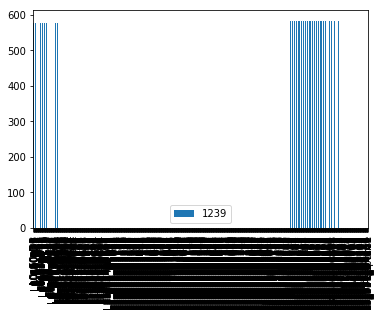

In [57]:
df_date_ok[1234:1235].drop('Id', axis=1).transpose().plot.bar()

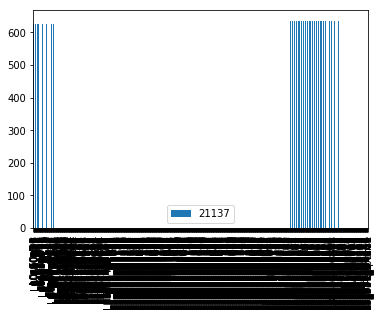

In [58]:
df_date_ng[1234:1235].drop('Id', axis=1).transpose().plot.bar()

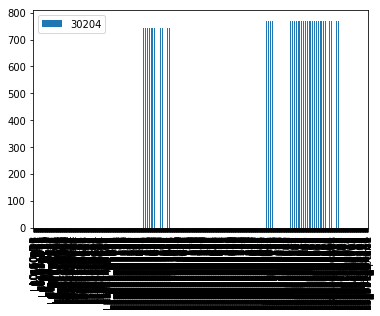

In [59]:
df_date_ok[30034:30035].drop('Id', axis=1).transpose().plot.bar()

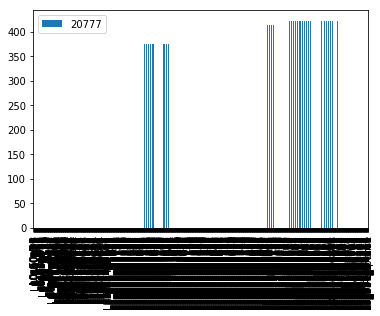

In [61]:
df_date_ng[3034:3035].drop('Id', axis=1).transpose().plot.bar()

#### stationの数が増えるにつけ、増えている。
→通過時間？、作業累積時間？かもしれない。  
　→だとすると、OK・NGで何か優位な差があるかもしれない。  
 
#### たまたまかもだが、NGに3段階見える。何か実際の数字に意味があるかもしれない。
→MAX, MIN, DIFF比べたい。

In [68]:
df_tmp = df_date_ok.drop('Id', axis=1)
df_date_ok_max = df_tmp.max(axis=1)
df_date_ok_min = df_tmp.min(axis=1)
(df_date_ok_max-df_date_ok_min).describe()


count    1.176868e+06
mean     8.592056e+02
std      4.688258e+02
min      0.000000e+00
25%      4.912400e+02
50%      8.884700e+02
75%      1.241530e+03
max      1.718480e+03
dtype: float64

In [69]:
df_tmp = df_date_ng.drop('Id', axis=1)
df_date_ng_max = df_tmp.max(axis=1)
df_date_ng_min = df_tmp.min(axis=1)
(df_date_ng_max-df_date_ng_min).describe()


count    6879.000000
mean      773.027649
std       421.911224
min         0.000000
25%       420.505005
50%       742.450012
75%      1005.839996
max      1716.910034
dtype: float64

### うーん。。。こういうのは中見ないといけないのかもなー

In [73]:

df_date_ok_max.to_csv('output/date_ok_max.csv')
df_date_ok_min.to_csv('output/date_ok_min.csv')
(df_date_ok_max-df_date_ok_min).to_csv('output/date_ok_diff.csv')

In [74]:
df_date_ng_max.to_csv('output/date_ng_max.csv')
df_date_ng_min.to_csv('output/date_ng_min.csv')
(df_date_ng_max-df_date_ng_min).to_csv('output/date_ng_diff.csv')

### ng_diff 連番IDが同じ値になってる！

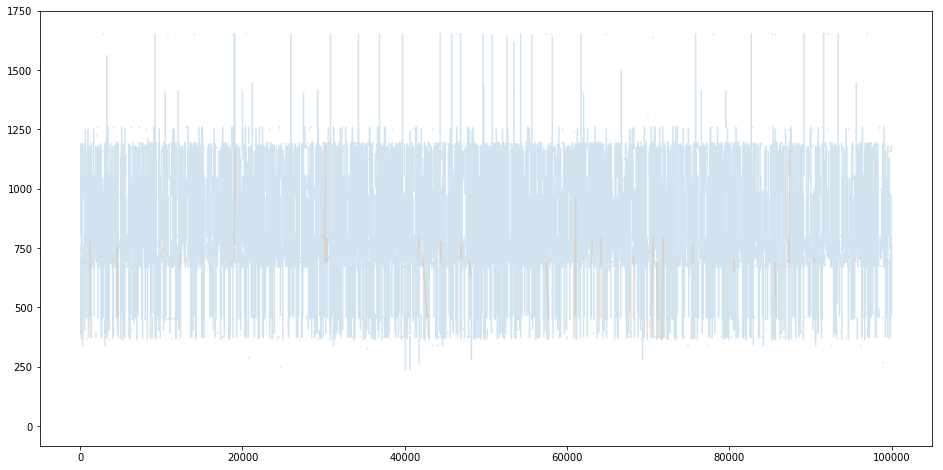

In [83]:
plt.figure(figsize=(16, 8)) 
df_date_ok['L1_S24_D1730'].plot(alpha=0.2)
df_date_ng['L1_S24_D1730'].plot(alpha=0.2)

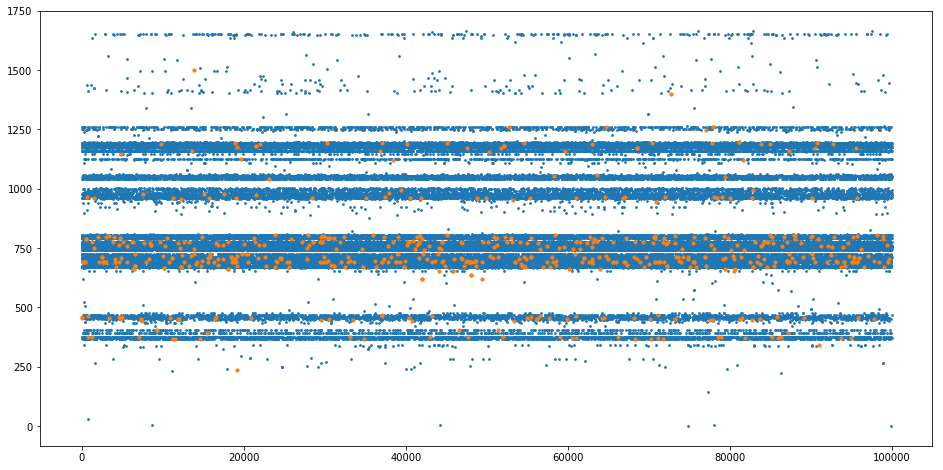

In [90]:
plt.figure(figsize=(16, 8)) 
plt.scatter(x=df_date_ok.index , y=df_date_ok['L1_S24_D1730'], s=3)
plt.scatter(x=df_date_ng.index , y=df_date_ng['L1_S24_D1730'], s=10)

### 適当に選択したステーションだけど、1500以上にはNGはいない。

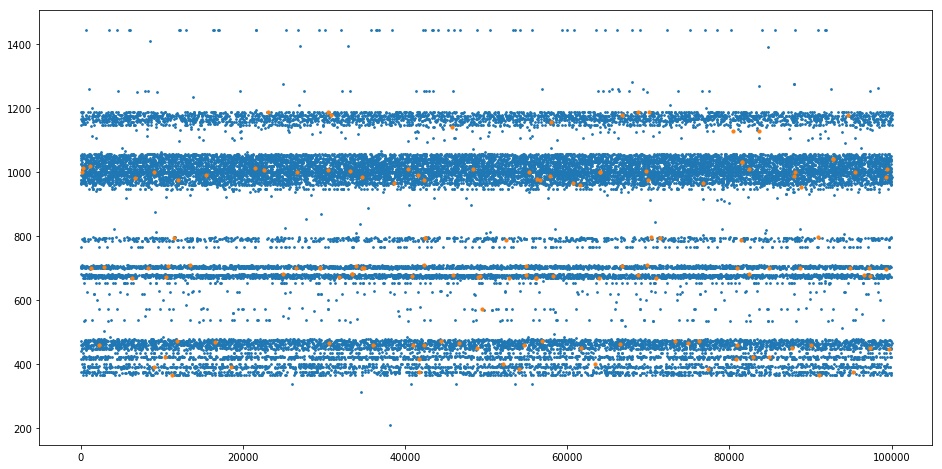

In [92]:
plt.figure(figsize=(16, 8)) 
plt.scatter(x=df_date_ok.index , y=df_date_ok['L1_S25_D2038'], s=3)
plt.scatter(x=df_date_ng.index , y=df_date_ng['L1_S25_D2038'], s=10)

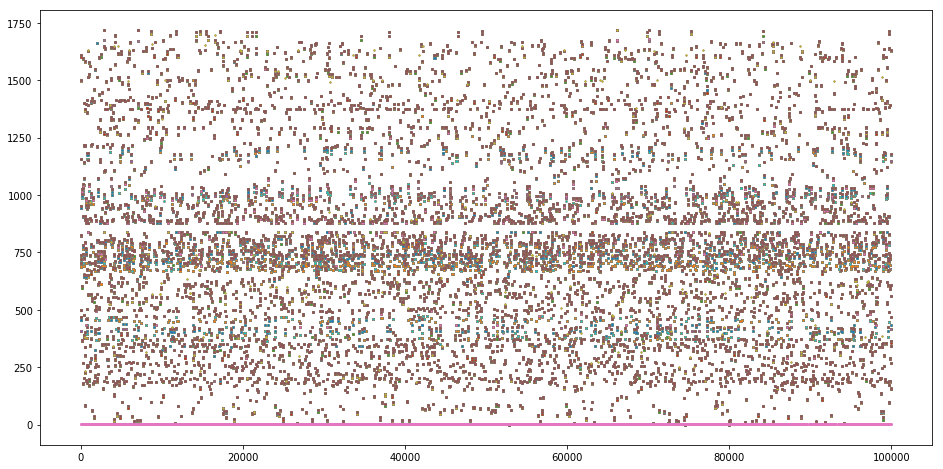

In [104]:
df_tmp = df_date_ng.drop('Id', axis=1)
plt.figure(figsize=(16, 8)) 
for colname in df_tmp.columns:
    plt.scatter(x=df_tmp.index , y=df_tmp[colname], s=1)

### 全ステーションで確認。ある閾値は見えてこない。ステーションごとにみないとダメかも。

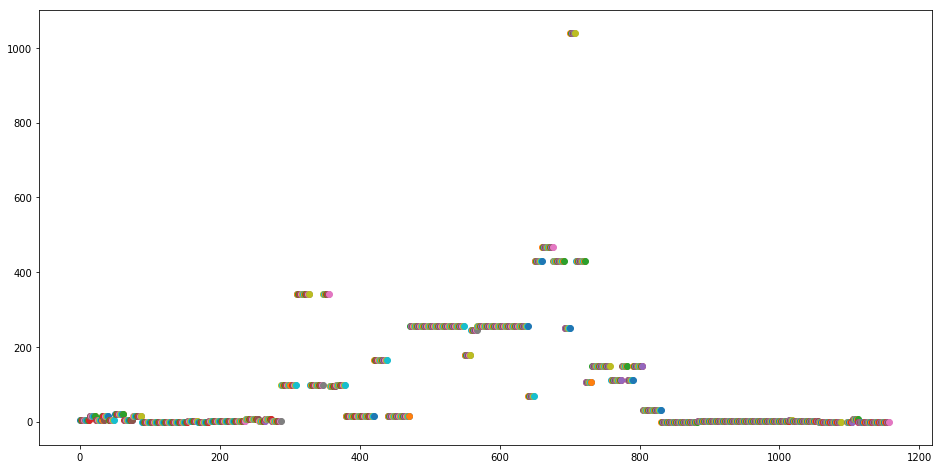

In [119]:
df_tmp_ok = df_date_ok.drop('Id', axis=1)
df_tmp_ng = df_date_ng.drop('Id', axis=1)
plt.figure(figsize=(16, 8)) 
i = 0
for colname in df_tmp.columns:
    plt.scatter(x=i , y=(df_tmp_ok[colname].max() - df_tmp_ng[colname].max()))
    i = i+1
    

In [122]:
MaxtimeDiff = df_tmp_ok.max() - df_tmp_ng.max()

In [144]:
MaxtimeDiff_dup = MaxtimeDiff.drop_duplicates()
MaxtimeDiff_dup_drop = MaxtimeDiff_dup[MaxtimeDiff_dup > 100]
MaxtimeDiff_dup_drop.sort_values(ascending=False)[:100]


L1_S25_D2713    1040.660034
L1_S25_D2518     468.169922
L1_S25_D2505     429.430054
L1_S25_D2497     429.420044
L1_S24_D1368     342.400024
L1_S24_D1186     341.440063
L1_S25_D1902     257.079956
L1_S25_D2058     256.919922
L1_S25_D1980     256.859985
L1_S25_D1891     256.849976
L1_S25_D1867     256.840088
L1_S25_D1854     256.839966
L1_S25_D2406     255.890015
L1_S25_D2251     255.809937
L1_S25_D2329     255.669922
L1_S25_D2230     255.659912
L1_S25_D2445     255.630005
L1_S25_D2674     249.709961
L1_S25_D2206     246.549927
L1_S25_D2180     178.690002
L1_S24_D1674     163.790039
L1_S25_D2801     150.219971
L1_S25_D2780     150.199951
L1_S25_D2879     110.859985
L1_S25_D2996     110.849976
L1_S25_D2754     105.700073
dtype: float64

### これらを選択したいが、列のMAXとかとってるので、テストデータでやると、OKの値になる。。。
L1_S25_D2713    1040.660034
L1_S25_D2518     468.169922
L1_S25_D2505     429.430054
L1_S25_D2497     429.420044
L1_S24_D1368     342.400024

In [101]:
df_date_ng.head()

,Id,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,L0_S0_D17,L0_S0_D19,L0_S0_D21,L0_S0_D23,L0_S1_D26,L0_S1_D30,L0_S2_D34,L0_S2_D38,L0_S2_D42,L0_S2_D46,L0_S2_D50,L0_S2_D54,L0_S2_D58,L0_S2_D62,L0_S2_D66,L0_S3_D70,L0_S3_D74,L0_S3_D78,L0_S3_D82,L0_S3_D86,L0_S3_D90,L0_S3_D94,L0_S3_D98,L0_S3_D102,L0_S4_D106,L0_S4_D111,L0_S5_D115,L0_S5_D117,L0_S6_D120,L0_S6_D124,L0_S6_D127,L0_S6_D130,L0_S6_D134,L0_S7_D137,L0_S7_D139,L0_S7_D140,L0_S7_D141,L0_S7_D143,L0_S8_D145,L0_S8_D147,L0_S8_D148,L0_S8_D150,L0_S9_D152,L0_S9_D157,L0_S9_D162,L0_S9_D167,L0_S9_D172,L0_S9_D177,L0_S9_D182,L0_S9_D187,L0_S9_D192,L0_S9_D197,L0_S9_D202,L0_S9_D207,L0_S9_D212,L0_S10_D216,L0_S10_D221,L0_S10_D226,L0_S10_D231,L0_S10_D236,L0_S10_D241,L0_S10_D246,L0_S10_D251,L0_S10_D256,L0_S10_D261,L0_S10_D266,L0_S10_D271,L0_S10_D276,L0_S11_D280,L0_S11_D284,L0_S11_D288,L0_S11_D292,L0_S11_D296,L0_S11_D300,L0_S11_D304,L0_S11_D308,L0_S11_D312,L0_S11_D316,L0_S11_D320,L0_S11_D324,L0_S11_D328,L0_S12_D331,L0_S12_D333,L0_S12_D335,L0_S12_D337,L0_S12_D339,L0_S12_D341,L0_S12_D343,L0_S12_D345,L0_S12_D347,L0_S12_D349,L0_S12_D351,L0_S12_D353,L0_S13_D355,L0_S13_D357,L0_S14_D360,L0_S14_D364,L0_S14_D368,L0_S14_D372,L0_S14_D376,L0_S14_D380,L0_S14_D384,L0_S14_D388,L0_S14_D392,L0_S15_D395,L0_S15_D398,L0_S15_D401,L0_S15_D404,L0_S15_D407,L0_S15_D410,L0_S15_D413,L0_S15_D416,L0_S15_D419,L0_S16_D423,L0_S16_D428,L0_S17_D432,L0_S17_D434,L0_S18_D437,L0_S18_D441,L0_S18_D444,L0_S18_D447,L0_S18_D451,L0_S19_D454,L0_S19_D456,L0_S19_D457,L0_S19_D458,L0_S19_D460,L0_S20_D462,L0_S20_D464,L0_S20_D465,L0_S20_D467,L0_S21_D469,L0_S21_D474,L0_S21_D479,L0_S21_D484,L0_S21_D489,L0_S21_D494,L0_S21_D499,L0_S21_D504,L0_S21_D509,L0_S21_D514,L0_S21_D519,L0_S21_D524,L0_S21_D529,L0_S21_D534,L0_S21_D539,L0_S22_D543,L0_S22_D548,L0_S22_D553,L0_S22_D558,L0_S22_D563,L0_S22_D568,L0_S22_D573,L0_S22_D578,L0_S22_D583,L0_S22_D588,L0_S22_D593,L0_S22_D598,L0_S22_D603,L0_S22_D608,L0_S22_D613,L0_S23_D617,L0_S23_D621,L0_S23_D625,L0_S23_D629,L0_S23_D633,L0_S23_D637,L0_S23_D641,L0_S23_D645,L0_S23_D649,L0_S23_D653,L0_S23_D657,L0_S23_D661,L0_S23_D665,L0_S23_D669,L0_S23_D673,L1_S24_D677,L1_S24_D681,L1_S24_D685,L1_S24_D689,L1_S24_D693,L1_S24_D697,L1_S24_D702,L1_S24_D707,L1_S24_D712,L1_S24_D716,L1_S24_D721,L1_S24_D725,L1_S24_D730,L1_S24_D735,L1_S24_D739,L1_S24_D743,L1_S24_D748,L1_S24_D753,L1_S24_D758,L1_S24_D763,L1_S24_D768,L1_S24_D772,L1_S24_D777,L1_S24_D782,L1_S24_D787,L1_S24_D792,L1_S24_D797,L1_S24_D801,L1_S24_D804,L1_S24_D807,L1_S24_D809,L1_S24_D811,L1_S24_D813,L1_S24_D815,L1_S24_D818,L1_S24_D822,L1_S24_D826,L1_S24_D831,L1_S24_D836,L1_S24_D841,L1_S24_D846,L1_S24_D850,L1_S24_D854,L1_S24_D859,L1_S24_D864,L1_S24_D869,L1_S24_D874,L1_S24_D879,L1_S24_D884,L1_S24_D889,L1_S24_D894,L1_S24_D899,L1_S24_D904,L1_S24_D909,L1_S24_D913,L1_S24_D917,L1_S24_D922,L1_S24_D927,L1_S24_D932,L1_S24_D937,L1_S24_D941,L1_S24_D945,L1_S24_D950,L1_S24_D955,L1_S24_D960,L1_S24_D965,L1_S24_D970,L1_S24_D975,L1_S24_D980,L1_S24_D985,L1_S24_D990,L1_S24_D995,L1_S24_D999,L1_S24_D1001,L1_S24_D1003,L1_S24_D1005,L1_S24_D1007,L1_S24_D1009,L1_S24_D1011,L1_S24_D1013,L1_S24_D1015,L1_S24_D1018,L1_S24_D1023,L1_S24_D1028,L1_S24_D1033,L1_S24_D1038,L1_S24_D1043,L1_S24_D1048,L1_S24_D1053,L1_S24_D1058,L1_S24_D1062,L1_S24_D1066,L1_S24_D1070,L1_S24_D1074,L1_S24_D1077,L1_S24_D1081,L1_S24_D1085,L1_S24_D1089,L1_S24_D1092,L1_S24_D1096,L1_S24_D1100,L1_S24_D1104,L1_S24_D1108,L1_S24_D1112,L1_S24_D1116,L1_S24_D1120,L1_S24_D1124,L1_S24_D1128,L1_S24_D1132,L1_S24_D1135,L1_S24_D1138,L1_S24_D1141,L1_S24_D1143,L1_S24_D1146,L1_S24_D1149,L1_S24_D1151,L1_S24_D1153,L1_S24_D1155,L1_S24_D1158,L1_S24_D1163,L1_S24_D1168,L1_S24_D1171,L1_S24_D1173,L1_S24_D1175,L1_S24_D1178,L1_S24_D1182,L1_S24_D1186,L1_S24_D1190,L1_S24_D1194,L1_S24_D1199,L1_S24_D1204,L1_S24_D1209,L1_S24_D1214,L1_S24_D1218,L1_S24_D1222,L1_S24_D1227,L1_S24_D1232,L1_S24_D1237,L1_S24_D1242,L1_S24_D1247,L1_S24_D1252,L1_S24_D1257,L1_S24_D1262,L1_S24_D1267,L1_S24_D1272,L1_S24_D1277,L1_S24_D1281,L1_S24_D1285,L1_S24_D1290,L1_S24_D1295,L1_S24_D13

In [88]:
df_date_ng.tail()

,Id,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,L0_S0_D17,L0_S0_D19,L0_S0_D21,L0_S0_D23,L0_S1_D26,L0_S1_D30,L0_S2_D34,L0_S2_D38,L0_S2_D42,L0_S2_D46,L0_S2_D50,L0_S2_D54,L0_S2_D58,L0_S2_D62,L0_S2_D66,L0_S3_D70,L0_S3_D74,L0_S3_D78,L0_S3_D82,L0_S3_D86,L0_S3_D90,L0_S3_D94,L0_S3_D98,L0_S3_D102,L0_S4_D106,L0_S4_D111,L0_S5_D115,L0_S5_D117,L0_S6_D120,L0_S6_D124,L0_S6_D127,L0_S6_D130,L0_S6_D134,L0_S7_D137,L0_S7_D139,L0_S7_D140,L0_S7_D141,L0_S7_D143,L0_S8_D145,L0_S8_D147,L0_S8_D148,L0_S8_D150,L0_S9_D152,L0_S9_D157,L0_S9_D162,L0_S9_D167,L0_S9_D172,L0_S9_D177,L0_S9_D182,L0_S9_D187,L0_S9_D192,L0_S9_D197,L0_S9_D202,L0_S9_D207,L0_S9_D212,L0_S10_D216,L0_S10_D221,L0_S10_D226,L0_S10_D231,L0_S10_D236,L0_S10_D241,L0_S10_D246,L0_S10_D251,L0_S10_D256,L0_S10_D261,L0_S10_D266,L0_S10_D271,L0_S10_D276,L0_S11_D280,L0_S11_D284,L0_S11_D288,L0_S11_D292,L0_S11_D296,L0_S11_D300,L0_S11_D304,L0_S11_D308,L0_S11_D312,L0_S11_D316,L0_S11_D320,L0_S11_D324,L0_S11_D328,L0_S12_D331,L0_S12_D333,L0_S12_D335,L0_S12_D337,L0_S12_D339,L0_S12_D341,L0_S12_D343,L0_S12_D345,L0_S12_D347,L0_S12_D349,L0_S12_D351,L0_S12_D353,L0_S13_D355,L0_S13_D357,L0_S14_D360,L0_S14_D364,L0_S14_D368,L0_S14_D372,L0_S14_D376,L0_S14_D380,L0_S14_D384,L0_S14_D388,L0_S14_D392,L0_S15_D395,L0_S15_D398,L0_S15_D401,L0_S15_D404,L0_S15_D407,L0_S15_D410,L0_S15_D413,L0_S15_D416,L0_S15_D419,L0_S16_D423,L0_S16_D428,L0_S17_D432,L0_S17_D434,L0_S18_D437,L0_S18_D441,L0_S18_D444,L0_S18_D447,L0_S18_D451,L0_S19_D454,L0_S19_D456,L0_S19_D457,L0_S19_D458,L0_S19_D460,L0_S20_D462,L0_S20_D464,L0_S20_D465,L0_S20_D467,L0_S21_D469,L0_S21_D474,L0_S21_D479,L0_S21_D484,L0_S21_D489,L0_S21_D494,L0_S21_D499,L0_S21_D504,L0_S21_D509,L0_S21_D514,L0_S21_D519,L0_S21_D524,L0_S21_D529,L0_S21_D534,L0_S21_D539,L0_S22_D543,L0_S22_D548,L0_S22_D553,L0_S22_D558,L0_S22_D563,L0_S22_D568,L0_S22_D573,L0_S22_D578,L0_S22_D583,L0_S22_D588,L0_S22_D593,L0_S22_D598,L0_S22_D603,L0_S22_D608,L0_S22_D613,L0_S23_D617,L0_S23_D621,L0_S23_D625,L0_S23_D629,L0_S23_D633,L0_S23_D637,L0_S23_D641,L0_S23_D645,L0_S23_D649,L0_S23_D653,L0_S23_D657,L0_S23_D661,L0_S23_D665,L0_S23_D669,L0_S23_D673,L1_S24_D677,L1_S24_D681,L1_S24_D685,L1_S24_D689,L1_S24_D693,L1_S24_D697,L1_S24_D702,L1_S24_D707,L1_S24_D712,L1_S24_D716,L1_S24_D721,L1_S24_D725,L1_S24_D730,L1_S24_D735,L1_S24_D739,L1_S24_D743,L1_S24_D748,L1_S24_D753,L1_S24_D758,L1_S24_D763,L1_S24_D768,L1_S24_D772,L1_S24_D777,L1_S24_D782,L1_S24_D787,L1_S24_D792,L1_S24_D797,L1_S24_D801,L1_S24_D804,L1_S24_D807,L1_S24_D809,L1_S24_D811,L1_S24_D813,L1_S24_D815,L1_S24_D818,L1_S24_D822,L1_S24_D826,L1_S24_D831,L1_S24_D836,L1_S24_D841,L1_S24_D846,L1_S24_D850,L1_S24_D854,L1_S24_D859,L1_S24_D864,L1_S24_D869,L1_S24_D874,L1_S24_D879,L1_S24_D884,L1_S24_D889,L1_S24_D894,L1_S24_D899,L1_S24_D904,L1_S24_D909,L1_S24_D913,L1_S24_D917,L1_S24_D922,L1_S24_D927,L1_S24_D932,L1_S24_D937,L1_S24_D941,L1_S24_D945,L1_S24_D950,L1_S24_D955,L1_S24_D960,L1_S24_D965,L1_S24_D970,L1_S24_D975,L1_S24_D980,L1_S24_D985,L1_S24_D990,L1_S24_D995,L1_S24_D999,L1_S24_D1001,L1_S24_D1003,L1_S24_D1005,L1_S24_D1007,L1_S24_D1009,L1_S24_D1011,L1_S24_D1013,L1_S24_D1015,L1_S24_D1018,L1_S24_D1023,L1_S24_D1028,L1_S24_D1033,L1_S24_D1038,L1_S24_D1043,L1_S24_D1048,L1_S24_D1053,L1_S24_D1058,L1_S24_D1062,L1_S24_D1066,L1_S24_D1070,L1_S24_D1074,L1_S24_D1077,L1_S24_D1081,L1_S24_D1085,L1_S24_D1089,L1_S24_D1092,L1_S24_D1096,L1_S24_D1100,L1_S24_D1104,L1_S24_D1108,L1_S24_D1112,L1_S24_D1116,L1_S24_D1120,L1_S24_D1124,L1_S24_D1128,L1_S24_D1132,L1_S24_D1135,L1_S24_D1138,L1_S24_D1141,L1_S24_D1143,L1_S24_D1146,L1_S24_D1149,L1_S24_D1151,L1_S24_D1153,L1_S24_D1155,L1_S24_D1158,L1_S24_D1163,L1_S24_D1168,L1_S24_D1171,L1_S24_D1173,L1_S24_D1175,L1_S24_D1178,L1_S24_D1182,L1_S24_D1186,L1_S24_D1190,L1_S24_D1194,L1_S24_D1199,L1_S24_D1204,L1_S24_D1209,L1_S24_D1214,L1_S24_D1218,L1_S24_D1222,L1_S24_D1227,L1_S24_D1232,L1_S24_D1237,L1_S24_D1242,L1_S24_D1247,L1_S24_D1252,L1_S24_D1257,L1_S24_D1262,L1_S24_D1267,L1_S24_D1272,L1_S24_D1277,L1_S24_D1281,L1_S24_D1285,L1_S24_D1290,L1_S24_D1295,L1_S24_D13

In [6]:
print (df_date_ok.info())
print (df_date_ok.count())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176868 entries, 0 to 83746
Columns: 2126 entries, Id to Response
dtypes: float32(2126)
memory usage: 9.3 GB
None
Id              1176868
L0_S0_D1         670254
L0_S0_D3         670254
L0_S0_D5         670254
L0_S0_D7         670254
L0_S0_D9         670254
L0_S0_D11        670254
L0_S0_D13        670254
L0_S0_D15        670254
L0_S0_D17        670254
L0_S0_D19        670254
L0_S0_D21        670254
L0_S0_D23        670254
L0_S1_D26        670296
L0_S1_D30        670298
L0_S2_D34        337957
L0_S2_D38        337957
L0_S2_D42        337957
L0_S2_D46        337957
L0_S2_D50        337957
L0_S2_D54        337957
L0_S2_D58        337957
L0_S2_D62        337957
L0_S2_D66        337957
L0_S3_D70        332916
L0_S3_D74        332916
L0_S3_D78        332916
L0_S3_D82        332916
L0_S3_D86        332916
L0_S3_D90        332916
                 ...   
L3_S47_F4168      59651
L3_S47_F4173      59651
L3_S47_F4178      59651
L3_S47_F4183      59

In [7]:
df_date_ok.tail()

Id     L0_S0_D1     L0_S0_D3     L0_S0_D5     L0_S0_D7  \
83742  2367490.0  1239.900024  1239.900024  1239.900024  1239.900024   
83743  2367491.0          NaN          NaN          NaN          NaN   
83744  2367492.0  1482.180054  1482.180054  1482.180054  1482.180054   
83745  2367493.0   608.830017   608.830017   608.830017   608.830017   
83746  2367495.0   937.609985   937.609985   937.609985   937.609985   

          L0_S0_D9    L0_S0_D11    L0_S0_D13    L0_S0_D15    L0_S0_D17  \
83742  1239.900024  1239.900024  1239.900024  1239.900024  1239.900024   
83743          NaN          NaN          NaN          NaN          NaN   
83744  1482.180054  1482.180054  1482.180054  1482.180054  1482.180054   
83745   608.830017   608.830017   608.830017   608.830017   608.830017   
83746   937.609985   937.609985   937.609985   937.609985   937.609985   

         L0_S0_D19    L0_S0_D21    L0_S0_D23    L0_S1_D26    L0_S1_D30  \
83742  1239.900024  1239.900024  1239.900024  1239.900024  1239.900024   
83743          NaN          NaN          NaN          NaN          NaN   
83744  1482.180054  1482.180054  1482.180054  1482.180054  1482.180054   
83745   608.830017   608.830017   608.830017   608.830017   608.830017   
83746   937.609985   937.609985   937.609985   937.609985   937.609985   

         L0_S2_D34    L0_S2_D38    L0_S2_D42    L0_S2_D46    L0_S2_D50  \
83742  1239.910034  1239.910034  1239.910034  1239.910034  1239.910034   
83743          NaN          NaN          NaN          NaN          NaN   
83744          NaN          NaN          NaN          NaN          NaN   
83745          NaN          NaN          NaN          NaN          NaN   
83746   937.609985   937.609985   937.609985   937.609985   937.609985   

         L0_S2_D54    L0_S2_D58    L0_S2_D62    L0_S2_D66    L0_S3_D70  \
83742  1239.910034  1239.910034  1239.910034  1239.910034          NaN   
83743          NaN          NaN          NaN          NaN          NaN   
83744          NaN          NaN          NaN          NaN  1482.189941   
83745          NaN          NaN          NaN          NaN   608.830017   
83746   937.609985   937.609985   937.609985   937.609985          NaN   

         L0_S3_D74    L0_S3_D78    L0_S3_D82    L0_S3_D86    L0_S3_D90  \
83742          NaN          NaN          NaN          NaN          NaN   
83743          NaN          NaN          NaN          NaN          NaN   
83744  1482.189941  1482.189941  1482.189941  1482.189941  1482.189941   
83745   608.830017   608.830017   608.830017   608.830017   608.830017   
83746          NaN          NaN          NaN          NaN          NaN   

         L0_S3_D94    L0_S3_D98   L0_S3_D102   L0_S4_D106   L0_S4_D111  \
83742          NaN          NaN          NaN  1239.930054  1239.930054   
83743          NaN          NaN          NaN          NaN          NaN   
83744  1482.189941  1482.189941  1482.189941          NaN          NaN   
83745   608.830017   608.830017   608.830017   608.849976   608.849976   
83746          NaN          NaN          NaN   937.640015   937.640015   

        L0_S5_D115   L0_S5_D117   L0_S6_D120   L0_S6_D124   L0_S6_D127  \
83742          NaN          NaN  1239.930054  1239.930054  1239.930054   
83743          NaN          NaN          NaN          NaN          NaN   
83744  1482.199951  1482.199951  1482.209961  1482.209961  1482.209961   
83745          NaN          NaN          NaN          NaN          NaN   
83746          NaN          NaN          NaN          NaN          NaN   

        L0_S6_D130   L0_S6_D134  L0_S7_D137  L0_S7_D139  L0_S7_D140  \
83742  1239.930054  1239.930054         NaN         NaN         NaN   
83743          NaN          NaN         NaN         NaN         NaN   
83744  1482.209961  1482.209961         NaN         NaN         NaN   
83745          NaN          NaN  608.849976  608.849976  608.849976   
83746          NaN          NaN  937.640015  937.640015  937.640015   

       L0_S7_D141  L0_S7_D143   L0_S8_D

In [4]:
CHUNKSIZE = 100000

TRAIN_DATE        = "train_date.csv"
TRAIN_NUMERIC     = "train_numeric.csv"
TRAIN_CATEGORICAL = "train_categorical.csv"
TEST_DATE         = "test_date.csv"
TEST_NUMERIC      = "test_numeric.csv"
TEST_CATEGORICAL  = "test_categorical.csv"

SEED = 0
CHUNKSIZE = 50000
NROWS = 1200000

ID_COLUMN = 'Id'
TARGET_COLUMN = 'Response'
 

In [ ]:
#df_train_date = pd.read_csv(TRAIN_DATE, nrows=10)


In [106]:
STATION_NUM = 52

date_cols = df_date_ok.columns

date_feature_list = []

for cur_station_id in range(STATION_NUM):
    date_feature_list_one = []
    for column_name in date_cols:
        if column_name != 'Id':
            r = parse("L{}_S{}_D{}", column_name)
            if r is not None:
                col_line_id    = int(r[0])
                col_station_id = int(r[1])
                
                if cur_station_id == col_station_id:
                    date_feature_list_one.append(column_name)

    date_feature_list.append(date_feature_list_one)

stations_top = []
for st in date_feature_list:
    stations_top.append(st[0])

stations_top    

['L0_S0_D1',
 'L0_S1_D26',
 'L0_S2_D34',
 'L0_S3_D70',
 'L0_S4_D106',
 'L0_S5_D115',
 'L0_S6_D120',
 'L0_S7_D137',
 'L0_S8_D145',
 'L0_S9_D152',
 'L0_S10_D216',
 'L0_S11_D280',
 'L0_S12_D331',
 'L0_S13_D355',
 'L0_S14_D360',
 'L0_S15_D395',
 'L0_S16_D423',
 'L0_S17_D432',
 'L0_S18_D437',
 'L0_S19_D454',
 'L0_S20_D462',
 'L0_S21_D469',
 'L0_S22_D543',
 'L0_S23_D617',
 'L1_S24_D677',
 'L1_S25_D1854',
 'L2_S26_D3037',
 'L2_S27_D3130',
 'L2_S28_D3223',
 'L3_S29_D3316',
 'L3_S30_D3496',
 'L3_S31_D3836',
 'L3_S32_D3852',
 'L3_S33_D3856',
 'L3_S34_D3875',
 'L3_S35_D3886',
 'L3_S36_D3919',
 'L3_S37_D3942',
 'L3_S38_D3953',
 'L3_S39_D3966',
 'L3_S40_D3981',
 'L3_S41_D3997',
 'L3_S42_D4029',
 'L3_S43_D4062',
 'L3_S44_D4101',
 'L3_S45_D4125',
 'L3_S46_D4135',
 'L3_S47_D4140',
 'L3_S48_D4194',
 'L3_S49_D4208',
 'L3_S50_D4242',
 'L3_S51_D4255']

In [11]:
date_feature_list[0]

['L0_S0_D1',
 'L0_S0_D3',
 'L0_S0_D5',
 'L0_S0_D7',
 'L0_S0_D9',
 'L0_S0_D11',
 'L0_S0_D13',
 'L0_S0_D15',
 'L0_S0_D17',
 'L0_S0_D19',
 'L0_S0_D21',
 'L0_S0_D23']

In [12]:
stationFeatureNumList = []
#stationFeatureNumList.append(len(date_feature_list[]))
for station in range(STATION_NUM):
    stationFeatureNumList.append(len(date_feature_list[station]))
    
        

0    12
1     2
2     9
3     9
4     2
dtype: int64


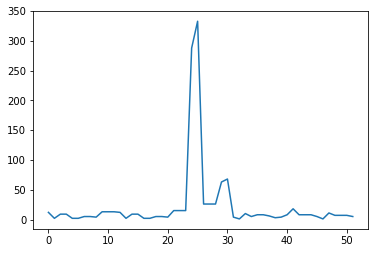

In [13]:
sStation = pd.Series(stationFeatureNumList)
print(sStation.head())
plt.plot(sStation )


### featureの数に偏りがある。
・難易度高いのか、何か情報いっぱい出している。

In [36]:
df_id  = df_date_ok.loc[:, 'Id']
df_id.head()

0     4.0
1     6.0
2     7.0
3     9.0
4    11.0
Name: Id, dtype: float32

In [16]:
date_feature_list[0]

['L0_S0_D1',
 'L0_S0_D3',
 'L0_S0_D5',
 'L0_S0_D7',
 'L0_S0_D9',
 'L0_S0_D11',
 'L0_S0_D13',
 'L0_S0_D15',
 'L0_S0_D17',
 'L0_S0_D19',
 'L0_S0_D21',
 'L0_S0_D23']

In [37]:
print(df_date_ng.columns)


df_date_ng_stations_list = []
df_date_ok_stations_list = []
for i in range(STATION_NUM):
    tmp_list = date_feature_list[i];
    tmp_list.append(ID_COLUMN)

    df_date_ng_stations_list.append(df_date_ng.loc[:, tmp_list])
    df_date_ok_stations_list.append(df_date_ok.loc[:, tmp_list])


Index(['Id', 'L0_S0_D1', 'L0_S0_D3', 'L0_S0_D5', 'L0_S0_D7', 'L0_S0_D9',
       'L0_S0_D11', 'L0_S0_D13', 'L0_S0_D15', 'L0_S0_D17',
       ...
       'L3_S50_F4245', 'L3_S50_F4247', 'L3_S50_F4249', 'L3_S50_F4251',
       'L3_S50_F4253', 'L3_S51_F4256', 'L3_S51_F4258', 'L3_S51_F4260',
       'L3_S51_F4262', 'Response'],
      dtype='object', length=2126)


In [32]:
df_date_ng_stations_list[0].head()

,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,L0_S0_D17,L0_S0_D19,L0_S0_D21,L0_S0_D23,Id,Id
539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1053.0,1053.0
633,619.179993,619.179993,619.179993,619.179993,619.179993,619.179993,619.179993,619.179993,619.179993,619.179993,619.179993,619.179993,1250.0,1250.0
681,640.200012,640.200012,640.200012,640.200012,640.200012,640.200012,640.200012,640.200012,640.200012,640.200012,640.200012,640.200012,1350.0,1350.0
887,1153.459961,1153.459961,1153.459961,1153.459961,1153.459961,1153.459961,1153.459961,1153.459961,1153.459961,1153.459961,1153.459961,1153.459961,1793.0,1793.0
1152,961.650024,961.650024,961.650024,961.650024,961.650024,961.650024,961.650024,961.650024,961.650024,961.650024,961.650024,961.650024,2347.0,2347.0


In [33]:
df_date_ok_stations_list[3].head()

,L0_S3_D70,L0_S3_D74,L0_S3_D78,L0_S3_D82,L0_S3_D86,L0_S3_D90,L0_S3_D94,L0_S3_D98,L0_S3_D102,Id,Id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0
4,602.640015,602.640015,602.640015,602.640015,602.640015,602.640015,602.640015,602.640015,602.640015,11.0,11.0


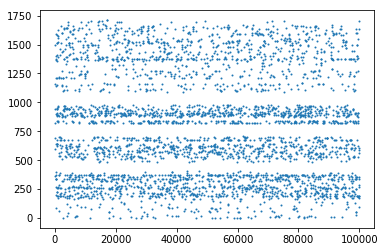

In [21]:
station_Used_in_ng = []
for ng in df_date_ng_stations_list:
    station_Used_in_ng.append(ng.drop('Id', axis=1).iloc[:,0])   

plt.scatter(station_Used_in_ng[0].index ,station_Used_in_ng[0], s=1)

In [22]:
print('station_Used_in_ng[0].fillna(0).values.max()')
print(len(station_Used_in_ng[0]))

station_Used_in_ng[0].fillna(0).values.max()
6879


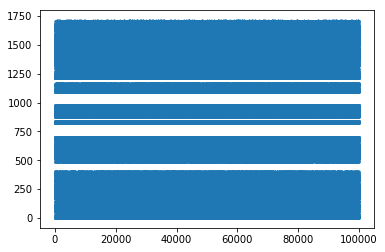

In [23]:
station_Used_in_ok = []
for ok in df_date_ok_stations_list:
    station_Used_in_ok.append(ok.drop('Id', axis=1).iloc[:,0])

plt.scatter(station_Used_in_ok[0].index ,station_Used_in_ok[0], s=1)

In [29]:
df_date_ok_stations_list[0].head()

,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,L0_S0_D17,L0_S0_D19,L0_S0_D21,L0_S0_D23,Id
0,82.239998,82.239998,82.239998,82.239998,82.239998,82.239998,82.239998,82.239998,82.239998,82.239998,82.239998,82.239998,4.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
2,1618.699951,1618.699951,1618.699951,1618.699951,1618.699951,1618.699951,1618.699951,1618.699951,1618.699951,1618.699951,1618.699951,1618.699951,7.0
3,1149.199951,1149.199951,1149.199951,1149.199951,1149.199951,1149.199951,1149.199951,1149.199951,1149.199951,1149.199951,1149.199951,1149.199951,9.0
4,602.640015,602.640015,602.640015,602.640015,602.640015,602.640015,602.640015,602.640015,602.640015,602.640015,602.640015,602.640015,11.0


In [30]:
df_date_ng_stations_list[0].head()

,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,L0_S0_D17,L0_S0_D19,L0_S0_D21,L0_S0_D23,Id
539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1053.0
633,619.179993,619.179993,619.179993,619.179993,619.179993,619.179993,619.179993,619.179993,619.179993,619.179993,619.179993,619.179993,1250.0
681,640.200012,640.200012,640.200012,640.200012,640.200012,640.200012,640.200012,640.200012,640.200012,640.200012,640.200012,640.200012,1350.0
887,1153.459961,1153.459961,1153.459961,1153.459961,1153.459961,1153.459961,1153.459961,1153.459961,1153.459961,1153.459961,1153.459961,1153.459961,1793.0
1152,961.650024,961.650024,961.650024,961.650024,961.650024,961.650024,961.650024,961.650024,961.650024,961.650024,961.650024,961.650024,2347.0


In [97]:
df_date_ng_stations_list[25].head()

,L1_S25_D1854,L1_S25_D1857,L1_S25_D1860,L1_S25_D1862,L1_S25_D1864,L1_S25_D1867,L1_S25_D1871,L1_S25_D1875,L1_S25_D1879,L1_S25_D1883,L1_S25_D1887,L1_S25_D1891,L1_S25_D1893,L1_S25_D1895,L1_S25_D1898,L1_S25_D1902,L1_S25_D1906,L1_S25_D1911,L1_S25_D1916,L1_S25_D1921,L1_S25_D1926,L1_S25_D1931,L1_S25_D1935,L1_S25_D1940,L1_S25_D1945,L1_S25_D1950,L1_S25_D1955,L1_S25_D1960,L1_S25_D1965,L1_S25_D1970,L1_S25_D1975,L1_S25_D1980,L1_S25_D1984,L1_S25_D1989,L1_S25_D1994,L1_S25_D1999,L1_S25_D2004,L1_S25_D2009,L1_S25_D2013,L1_S25_D2018,L1_S25_D2023,L1_S25_D2028,L1_S25_D2033,L1_S25_D2038,L1_S25_D2043,L1_S25_D2048,L1_S25_D2053,L1_S25_D2058,L1_S25_D2063,L1_S25_D2068,L1_S25_D2073,L1_S25_D2078,L1_S25_D2083,L1_S25_D2088,L1_S25_D2093,L1_S25_D2098,L1_S25_D2103,L1_S25_D2108,L1_S25_D2113,L1_S25_D2118,L1_S25_D2123,L1_S25_D2128,L1_S25_D2133,L1_S25_D2138,L1_S25_D2140,L1_S25_D2143,L1_S25_D2146,L1_S25_D2149,L1_S25_D2151,L1_S25_D2154,L1_S25_D2157,L1_S25_D2160,L1_S25_D2163,L1_S25_D2166,L1_S25_D2169,L1_S25_D2172,L1_S25_D2175,L1_S25_D2178,L1_S25_D2180,L1_S25_D2183,L1_S25_D2186,L1_S25_D2189,L1_S25_D2192,L1_S25_D2195,L1_S25_D2198,L1_S25_D2201,L1_S25_D2204,L1_S25_D2206,L1_S25_D2209,L1_S25_D2212,L1_S25_D2214,L1_S25_D2216,L1_S25_D2219,L1_S25_D2222,L1_S25_D2225,L1_S25_D2228,L1_S25_D2230,L1_S25_D2232,L1_S25_D2234,L1_S25_D2235,L1_S25_D2236,L1_S25_D2238,L1_S25_D2240,L1_S25_D2242,L1_S25_D2244,L1_S25_D2246,L1_S25_D2248,L1_S25_D2251,L1_S25_D2255,L1_S25_D2260,L1_S25_D2265,L1_S25_D2270,L1_S25_D2275,L1_S25_D2280,L1_S25_D2284,L1_S25_D2289,L1_S25_D2294,L1_S25_D2299,L1_S25_D2304,L1_S25_D2309,L1_S25_D2314,L1_S25_D2319,L1_S25_D2324,L1_S25_D2329,L1_S25_D2333,L1_S25_D2338,L1_S25_D2343,L1_S25_D2348,L1_S25_D2353,L1_S25_D2358,L1_S25_D2362,L1_S25_D2367,L1_S25_D2372,L1_S25_D2377,L1_S25_D2382,L1_S25_D2387,L1_S25_D2392,L1_S25_D2397,L1_S25_D2402,L1_S25_D2406,L1_S25_D2409,L1_S25_D2412,L1_S25_D2415,L1_S25_D2418,L1_S25_D2421,L1_S25_D2424,L1_S25_D2427,L1_S25_D2430,L1_S25_D2432,L1_S25_D2434,L1_S25_D2436,L1_S25_D2438,L1_S25_D2440,L1_S25_D2442,L1_S25_D2444,L1_S25_D2445,L1_S25_D2446,L1_S25_D2448,L1_S25_D2450,L1_S25_D2452,L1_S25_D2453,L1_S25_D2455,L1_S25_D2457,L1_S25_D2459,L1_S25_D2461,L1_S25_D2463,L1_S25_D2465,L1_S25_D2467,L1_S25_D2469,L1_S25_D2471,L1_S25_D2474,L1_S25_D2477,L1_S25_D2480,L1_S25_D2483,L1_S25_D2486,L1_S25_D2489,L1_S25_D2492,L1_S25_D2495,L1_S25_D2497,L1_S25_D2499,L1_S25_D2501,L1_S25_D2502,L1_S25_D2503,L1_S25_D2505,L1_S25_D2507,L1_S25_D2509,L1_S25_D2511,L1_S25_D2513,L1_S25_D2515,L1_S25_D2518,L1_S25_D2522,L1_S25_D2527,L1_S25_D2532,L1_S25_D2537,L1_S25_D2542,L1_S25_D2547,L1_S25_D2551,L1_S25_D2556,L1_S25_D2561,L1_S25_D2566,L1_S25_D2571,L1_S25_D2576,L1_S25_D2581,L1_S25_D2586,L1_S25_D2591,L1_S25_D2596,L1_S25_D2600,L1_S25_D2605,L1_S25_D2610,L1_S25_D2615,L1_S25_D2620,L1_S25_D2625,L1_S25_D2629,L1_S25_D2634,L1_S25_D2639,L1_S25_D2644,L1_S25_D2649,L1_S25_D2654,L1_S25_D2659,L1_S25_D2664,L1_S25_D2669,L1_S25_D2674,L1_S25_D2679,L1_S25_D2684,L1_S25_D2689,L1_S25_D2694,L1_S25_D2699,L1_S25_D2704,L1_S25_D2709,L1_S25_D2713,L1_S25_D2715,L1_S25_D2717,L1_S25_D2719,L1_S25_D2721,L1_S25_D2723,L1_S25_D2725,L1_S25_D2727,L1_S25_D2728,L1_S25_D2729,L1_S25_D2731,L1_S25_D2733,L1_S25_D2735,L1_S25_D2736,L1_S25_D2738,L1_S25_D2740,L1_S25_D2742,L1_S25_D2744,L1_S25_D2746,L1_S25_D2748,L1_S25_D2750,L1_S25_D2752,L1_S25_D2754,L1_S25_D2757,L1_S25_D2760,L1_S25_D2763,L1_S25_D2766,L1_S25_D2769,L1_S25_D2772,L1_S25_D2775,L1_S25_D2778,L1_S25_D2780,L1_S25_D2782,L1_S25_D2784,L1_S25_D2785,L1_S25_D2786,L1_S25_D2788,L1_S25_D2790,L1_S25_D2792,L1_S25_D2794,L1_S25_D2796,L1_S25_D2798,L1_S25_D2801,L1_S25_D2805,L1_S25_D2810,L1_S25_D2815,L1_S25_D2820,L1_S25_D2825,L1_S25_D2830,L1_S25_D2834,L1_S25_D2839,L1_S25_D2844,L1_S25_D2849,L1_S25_D2854,L1_S25_D2859,L1_S25_D2864,L1_S25_D2869,L1_S25_D2874,L1_S25_D2879,L1_S25_D2883,L1_S25_D2888,L1_S25_D2893,L1_S25_D2898,L1_S25_D2903,L1_S25_D2908,L1_S25_D2912,L1_S25_D2917,L1_S25_D2922,L1_S25_D2927,L1_S25_D2932,L1_S25_D2937,L1_S25_D2942,L1_S25_D2947,L1_S25_D2952,L1_S25_D2957,L1_S25_D2962,L1_S25_D2967,L1_S25_D2972,L1_S25_D

In [98]:
df_date_s25_ok = df_date_ok_stations_list[25]
df_date_s25_ng = df_date_ng_stations_list[25]

In [99]:
#plt.plot(df_date_s26_ng.values[4])
print(len(df_date_s25_ok.columns))
print(df_date_s25_ok.head())

334
   L1_S25_D1854  L1_S25_D1857  L1_S25_D1860  L1_S25_D1862  L1_S25_D1864  \
0           NaN           NaN           NaN           NaN           NaN   
1           NaN           NaN           NaN           NaN           NaN   
2           NaN           NaN           NaN           NaN           NaN   
3           NaN           NaN           NaN           NaN           NaN   
4           NaN           NaN           NaN           NaN           NaN   

   L1_S25_D1867  L1_S25_D1871  L1_S25_D1875  L1_S25_D1879  L1_S25_D1883  \
0           NaN           NaN           NaN           NaN           NaN   
1           NaN           NaN           NaN           NaN           NaN   
2           NaN           NaN           NaN           NaN           NaN   
3           NaN           NaN           NaN           NaN           NaN   
4           NaN           NaN           NaN           NaN           NaN   

   L1_S25_D1887  L1_S25_D1891  L1_S25_D1893  L1_S25_D1895  L1_S25_D1898  \
0           NaN    

In [109]:
tmpok = df_date_s25_ok.drop('Id', axis=1)
tmpng = df_date_s25_ng.drop('Id', axis=1)

MemoryError: 

In [107]:
#plt.scatter(tmpng.index ,tmpng.values, s=1)
tmpok.loc[0, :].head()


,L1_S25_D1854,L1_S25_D1857,L1_S25_D1860,L1_S25_D1862,L1_S25_D1864,L1_S25_D1867,L1_S25_D1871,L1_S25_D1875,L1_S25_D1879,L1_S25_D1883,L1_S25_D1887,L1_S25_D1891,L1_S25_D1893,L1_S25_D1895,L1_S25_D1898,L1_S25_D1902,L1_S25_D1906,L1_S25_D1911,L1_S25_D1916,L1_S25_D1921,L1_S25_D1926,L1_S25_D1931,L1_S25_D1935,L1_S25_D1940,L1_S25_D1945,L1_S25_D1950,L1_S25_D1955,L1_S25_D1960,L1_S25_D1965,L1_S25_D1970,L1_S25_D1975,L1_S25_D1980,L1_S25_D1984,L1_S25_D1989,L1_S25_D1994,L1_S25_D1999,L1_S25_D2004,L1_S25_D2009,L1_S25_D2013,L1_S25_D2018,L1_S25_D2023,L1_S25_D2028,L1_S25_D2033,L1_S25_D2038,L1_S25_D2043,L1_S25_D2048,L1_S25_D2053,L1_S25_D2058,L1_S25_D2063,L1_S25_D2068,L1_S25_D2073,L1_S25_D2078,L1_S25_D2083,L1_S25_D2088,L1_S25_D2093,L1_S25_D2098,L1_S25_D2103,L1_S25_D2108,L1_S25_D2113,L1_S25_D2118,L1_S25_D2123,L1_S25_D2128,L1_S25_D2133,L1_S25_D2138,L1_S25_D2140,L1_S25_D2143,L1_S25_D2146,L1_S25_D2149,L1_S25_D2151,L1_S25_D2154,L1_S25_D2157,L1_S25_D2160,L1_S25_D2163,L1_S25_D2166,L1_S25_D2169,L1_S25_D2172,L1_S25_D2175,L1_S25_D2178,L1_S25_D2180,L1_S25_D2183,L1_S25_D2186,L1_S25_D2189,L1_S25_D2192,L1_S25_D2195,L1_S25_D2198,L1_S25_D2201,L1_S25_D2204,L1_S25_D2206,L1_S25_D2209,L1_S25_D2212,L1_S25_D2214,L1_S25_D2216,L1_S25_D2219,L1_S25_D2222,L1_S25_D2225,L1_S25_D2228,L1_S25_D2230,L1_S25_D2232,L1_S25_D2234,L1_S25_D2235,L1_S25_D2236,L1_S25_D2238,L1_S25_D2240,L1_S25_D2242,L1_S25_D2244,L1_S25_D2246,L1_S25_D2248,L1_S25_D2251,L1_S25_D2255,L1_S25_D2260,L1_S25_D2265,L1_S25_D2270,L1_S25_D2275,L1_S25_D2280,L1_S25_D2284,L1_S25_D2289,L1_S25_D2294,L1_S25_D2299,L1_S25_D2304,L1_S25_D2309,L1_S25_D2314,L1_S25_D2319,L1_S25_D2324,L1_S25_D2329,L1_S25_D2333,L1_S25_D2338,L1_S25_D2343,L1_S25_D2348,L1_S25_D2353,L1_S25_D2358,L1_S25_D2362,L1_S25_D2367,L1_S25_D2372,L1_S25_D2377,L1_S25_D2382,L1_S25_D2387,L1_S25_D2392,L1_S25_D2397,L1_S25_D2402,L1_S25_D2406,L1_S25_D2409,L1_S25_D2412,L1_S25_D2415,L1_S25_D2418,L1_S25_D2421,L1_S25_D2424,L1_S25_D2427,L1_S25_D2430,L1_S25_D2432,L1_S25_D2434,L1_S25_D2436,L1_S25_D2438,L1_S25_D2440,L1_S25_D2442,L1_S25_D2444,L1_S25_D2445,L1_S25_D2446,L1_S25_D2448,L1_S25_D2450,L1_S25_D2452,L1_S25_D2453,L1_S25_D2455,L1_S25_D2457,L1_S25_D2459,L1_S25_D2461,L1_S25_D2463,L1_S25_D2465,L1_S25_D2467,L1_S25_D2469,L1_S25_D2471,L1_S25_D2474,L1_S25_D2477,L1_S25_D2480,L1_S25_D2483,L1_S25_D2486,L1_S25_D2489,L1_S25_D2492,L1_S25_D2495,L1_S25_D2497,L1_S25_D2499,L1_S25_D2501,L1_S25_D2502,L1_S25_D2503,L1_S25_D2505,L1_S25_D2507,L1_S25_D2509,L1_S25_D2511,L1_S25_D2513,L1_S25_D2515,L1_S25_D2518,L1_S25_D2522,L1_S25_D2527,L1_S25_D2532,L1_S25_D2537,L1_S25_D2542,L1_S25_D2547,L1_S25_D2551,L1_S25_D2556,L1_S25_D2561,L1_S25_D2566,L1_S25_D2571,L1_S25_D2576,L1_S25_D2581,L1_S25_D2586,L1_S25_D2591,L1_S25_D2596,L1_S25_D2600,L1_S25_D2605,L1_S25_D2610,L1_S25_D2615,L1_S25_D2620,L1_S25_D2625,L1_S25_D2629,L1_S25_D2634,L1_S25_D2639,L1_S25_D2644,L1_S25_D2649,L1_S25_D2654,L1_S25_D2659,L1_S25_D2664,L1_S25_D2669,L1_S25_D2674,L1_S25_D2679,L1_S25_D2684,L1_S25_D2689,L1_S25_D2694,L1_S25_D2699,L1_S25_D2704,L1_S25_D2709,L1_S25_D2713,L1_S25_D2715,L1_S25_D2717,L1_S25_D2719,L1_S25_D2721,L1_S25_D2723,L1_S25_D2725,L1_S25_D2727,L1_S25_D2728,L1_S25_D2729,L1_S25_D2731,L1_S25_D2733,L1_S25_D2735,L1_S25_D2736,L1_S25_D2738,L1_S25_D2740,L1_S25_D2742,L1_S25_D2744,L1_S25_D2746,L1_S25_D2748,L1_S25_D2750,L1_S25_D2752,L1_S25_D2754,L1_S25_D2757,L1_S25_D2760,L1_S25_D2763,L1_S25_D2766,L1_S25_D2769,L1_S25_D2772,L1_S25_D2775,L1_S25_D2778,L1_S25_D2780,L1_S25_D2782,L1_S25_D2784,L1_S25_D2785,L1_S25_D2786,L1_S25_D2788,L1_S25_D2790,L1_S25_D2792,L1_S25_D2794,L1_S25_D2796,L1_S25_D2798,L1_S25_D2801,L1_S25_D2805,L1_S25_D2810,L1_S25_D2815,L1_S25_D2820,L1_S25_D2825,L1_S25_D2830,L1_S25_D2834,L1_S25_D2839,L1_S25_D2844,L1_S25_D2849,L1_S25_D2854,L1_S25_D2859,L1_S25_D2864,L1_S25_D2869,L1_S25_D2874,L1_S25_D2879,L1_S25_D2883,L1_S25_D2888,L1_S25_D2893,L1_S25_D2898,L1_S25_D2903,L1_S25_D2908,L1_S25_D2912,L1_S25_D2917,L1_S25_D2922,L1_S25_D2927,L1_S25_D2932,L1_S25_D2937,L1_S25_D2942,L1_S25_D2947,L1_S25_D2952,L1_S25_D2957,L1_S25_D2962,L1_S25_D2967,L1_S25_D2972,L1_S25_D

In [ ]:
start = datetime.now()
C = df_station_top_isna.corr().abs()
print (C.Response.sort_values(ascending=False))

print("{} -> {}".format(start, datetime.now()))


In [ ]:
## 32,33,34,26 怪しい。数が多いのが原因かもしれないが、ここの通過点や数字には意味がありそう。

In [38]:
print (date_feature_list[26][0])
print (date_feature_list[32][0])
print (date_feature_list[33][0])
print (date_feature_list[34][0])


L2_S26_D3037
L3_S32_D3852
L3_S33_D3856
L3_S34_D3875


In [ ]:
print (df_date_ng.info())
print (df_date_ng.count())

In [ ]:
plt.scatter(station_Used_in_ng[32].index ,station_Used_in_ng[33], s=1)

In [ ]:
plt.scatter(station_Used_in_ok[33].index ,station_Used_in_ok[33], s=1)

In [ ]:
df_date_ng_station = df_date_ng.loc[:, stations_top]
df_date_ng_station.head()

In [ ]:
df_date_ng_station.to_csv('output/df_ng_station.csv')

NameError: name 'df_date_ng_station' is not defined

#### date_Is_Naの可視化

In [ ]:
start = datetime.now()
df_all = df.fillna(10000)
print(df.info())
print("{} -> {}".format(start, datetime.now()))

In [ ]:
start = datetime.now()
C = df_all.corr().abs()
C.Response.sort_values(ascending=False)

print("{} -> {}".format(start, datetime.now()))


In [ ]:
#C.to_csv('output/c_isna_output.csv')
C.to_csv('output/c_date_isna_output.csv')

In [ ]:
C.Response.sort_values(ascending=False)
# X = df.loc[C.columns[0:20]]